In [1]:
import numpy

In [2]:
numpy.version.full_version

'1.10.4'

In [3]:
from numpy import *

In [4]:
import numpy as np

In [5]:
a = np.array([0, 1, 2, 3, 4, 5])

In [6]:
a.ndim

1

In [7]:
a.shape

(6,)

In [8]:
b = a.reshape((3, 2))

In [9]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
b.ndim

2

In [11]:
b.shape

(3, 2)

In [12]:
b[1][0] = 77

In [13]:
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [14]:
a

array([ 0,  1, 77,  3,  4,  5])

In [15]:
b = a.reshape((3, 2))

In [16]:
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [17]:
b.ndim

2

In [18]:
b.shape

(3, 2)

In [19]:
b[1][0] = 77

In [20]:
a

array([ 0,  1, 77,  3,  4,  5])

In [21]:
c = a.reshape((3, 2)).copy()

In [22]:
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [23]:
c[0][0] = -99

In [24]:
a

array([ 0,  1, 77,  3,  4,  5])

In [25]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [26]:
d = np.array([1, 2, 3, 4, 5])

In [27]:
d*2

array([ 2,  4,  6,  8, 10])

In [28]:
d**2

array([ 1,  4,  9, 16, 25])

In [29]:
[1, 2, 3, 4, 5] * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [30]:
a[np.array([2, 3, 4])]

array([77,  3,  4])

In [31]:
a > 4

array([False, False,  True, False, False,  True], dtype=bool)

In [32]:
a[a>4]

array([77,  5])

In [33]:
a.clip(0, 4)

array([0, 1, 4, 3, 4, 4])

In [34]:
c = np.array([1, 2, np.NAN, 3, 4])

In [35]:
c

array([  1.,   2.,  nan,   3.,   4.])

In [36]:
np.isnan(c)

array([False, False,  True, False, False], dtype=bool)

In [37]:
c[~np.isnan(c)]

array([ 1.,  2.,  3.,  4.])

In [39]:
np.mean(c[~np.isnan(c)])

2.5

In [40]:
import timeit

In [42]:
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',
                             number = 1000)

In [43]:
niave_np_sec = timeit.timeit('sum(na*na)', setup = "import numpy as np; na = np.arange(1000)",
                            number = 1000)

In [44]:
good_np_sec = timeit.timeit('na.dot(na)', 
                           setup = "import numpy as np; na = np.arange(1000)",
                           number = 1000)

In [47]:
print("Normal Pytno: %f sec" % normal_py_sec)
print("Naive Numpy: %f sec" % niave_np_sec)

Normal Pytno: 0.133754 sec
Naive Numpy: 0.128086 sec


In [48]:
good_np_sec

0.0035229490022175014

In [49]:
a = np.array([1, 2, 3])

In [50]:
a.dtype

dtype('int64')

In [51]:
np.array([1, "stringy"])

array(['1', 'stringy'], 
      dtype='<U21')

In [52]:
np.array([1, "stringy", set([1, 2, 3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

In [53]:
import scipy, numpy

In [54]:
scipy.version.full_version

'0.17.0'

In [55]:
scipy.dot is numpy.dot

True

In [85]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/luispedro/BuildingMachineLearningSystemsWithPython/master/ch01/data/web_traffic.tsv",
                  sep = "\t", header = None)

In [89]:
data.to_csv("web_traffic.tsv", sep = "\t", index = False, header = False)

In [90]:
import scipy as sp

In [91]:
print(data.shape)

(743, 2)


In [92]:
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [93]:
print(data.shape)

(743, 2)


In [94]:
x = data[:, 0]

In [95]:
y = data[:, 1]

In [96]:
sp.sum(sp.isnan(y))

8

In [97]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [98]:
% matplotlib inline

In [99]:
import matplotlib.pyplot as plt

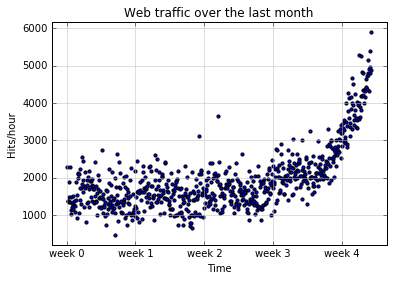

In [100]:
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.75')

In [101]:
def error(f, x, y):
    return sp.sum((f(x)-y) **2)

In [102]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)


In [103]:
print("Model parameters: %s" % fp1)

Model parameters: [   2.59619213  989.02487106]


In [104]:
print(residuals)

[  3.17389767e+08]


In [106]:
f1 = sp.poly1d(fp1)

In [108]:
print(error(f1, x, y))

317389767.34


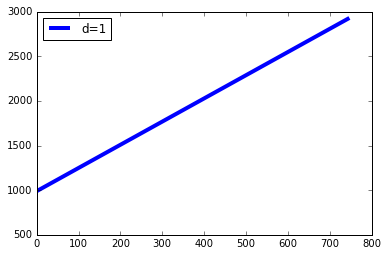

In [109]:
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth = 4)
plt.legend(["d=%i" % f1.order], loc="upper left")

In [110]:
f2p = sp.polyfit(x, y, 2)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
179983507.878


## Building Machine Learning System with Python (page 54 of 326)